# Persian News Category Prediction
In this notebook we are going to work with persian news dataset and create a classification model to predict category of news  from its title and body.


### About dataset
Dataset consists of 10999 rows and 7 features.
* NewsID
* Title
* Body
* Date
* Time
* Category: All categories
* Category2: The most related category

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('per.csv')
data.head()

,NewsID,Title,Body,Date,Time,Category,Category2
0,843656,\r\nوزير علوم درجمع استادان نمونه: سن بازنشستگ...,\r\nوزير علوم در جمع استادان نمونه كشور گفت: ا...,\r\n138/5//09,\r\n0:9::18,\r\nآموزشي-,\r\nآموزشي
1,837144,\r\nگردهمايي دانش‌آموختگان موسسه آموزش عالي سو...,\r\nبه گزارش سرويس صنفي آموزشي خبرگزاري دانشجو...,\r\n138/5//09,\r\n1:4::11,\r\nآموزشي-,\r\nآموزشي
2,436862,\r\nنتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌ن...,\r\nنتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي...,\r\n138/3//07,\r\n1:0::03,\r\nآموزشي-,\r\nآموزشي
3,227781,\r\nهمايش يكروزه آسيب شناسي مفهوم روابط عمومي ...,\r\n,\r\n138/2//02,\r\n1:3::42,\r\nاجتماعي-خانواده-,\r\nاجتماعي
4,174187,\r\nوضعيت اقتصادي و ميزان تحصيلات والدين از مه...,\r\nمحمدتقي علوي يزدي، مجري اين طرح پژوهشي در ...,\r\n138/1//08,\r\n1:1::49,\r\nآموزشي-,\r\nآموزشي


In [3]:
data.shape

(10999, 7)

# Preprocessing
* Stopwords removal
* Stemming
* Encoding

Persian stopwords

In [4]:
with open('stopwords.txt', encoding="utf8") as stopwords_file:
    stopwords = stopwords_file.readlines()
stopwords = [line.replace('\n', '') for line in stopwords]

In [5]:
stopwords[20:25]

['آخر', 'آخرها', 'آخه', 'آدمهاست', 'آرام']

In [6]:
len(stopwords)

1316

Persian stemmer

In [7]:
import hazm
from hazm import word_tokenize

In [8]:
stemmer = hazm.Stemmer()

In [9]:
stemmer.stem('کتاب‌ها')

'کتاب'

Creating a new dataset with title and body of each news after applying stemmer and stopwords removal

In [11]:
dataset = pd.DataFrame(columns=('title_body', 'category'))

In [12]:
for index, row in data.iterrows():
    title_body = row['Title'] + ' ' + row['Body']
    title_body_tokenized = word_tokenize(title_body)
    title_body_tokenized_filtered = [w for w in title_body_tokenized if not w in stopwords]
    title_body_tokenized_filtered_stemmed = [stemmer.stem(w) for w in title_body_tokenized_filtered]
    dataset.loc[index] = {
        'title_body': ' '.join(title_body_tokenized_filtered_stemmed).replace('\r', ''),
        'category': row['Category2'].replace('\n', '').replace('\r', '')
    }

In [13]:
dataset.head()

,title_body,category
0,وزير علو درجمع استاد نمونه سن بازنشستگي استاد...,آموزشي
1,گردهمايي دانش‌آموختگ موسسه آموز عالي سوره برگ...,آموزشي
2,نتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور ...,آموزشي
3,هماي يكروزه آسيب شناسي مفهو روابط عمومي بابلس...,اجتماعي
4,وضعي اقتصادي ميز تحصيل والدين مهمترين عوامل م...,آموزشي


In [14]:
dataset.shape

(10999, 2)

Encoding cleaned dataset

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer()

In [17]:
X = vectorizer.fit_transform(dataset['title_body'])

In [18]:
X.shape

(10999, 60849)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
y = le.fit_transform(dataset['category'])

In [21]:
le.classes_

array(['آموزشي', 'اجتماعي', 'اقتصادي', 'بهداشتي', 'تاريخي', 'سياسي',
       'علمي', 'فرهنگي', 'فقه و حقوق', 'مذهبي', 'ورزشي'], dtype=object)

In [22]:
len(y)

10999

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111)

---
# Modeling
In this part we use SVC to make predictions

In [25]:
from sklearn.svm import SVC

In [26]:
svc = SVC(random_state=123)

In [27]:
svc.fit(X_train, y_train)

SVC()

In [28]:
y_test[4]

4

Make prediction

In [29]:
svc.predict(X_test[4])

array([4])

In [30]:
le.inverse_transform([6])

array(['علمي'], dtype=object)

---
# Evaluation

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
y_pred = svc.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       258
           1       0.62      0.62      0.62       254
           2       0.82      0.82      0.82       242
           3       0.88      0.92      0.90       275
           4       0.88      0.92      0.90       239
           5       0.77      0.75      0.76       252
           6       0.80      0.75      0.77       252
           7       0.84      0.90      0.87       252
           8       0.93      0.85      0.89       240
           9       0.94      0.91      0.93       243
          10       0.97      0.96      0.97       243

    accuracy                           0.85      2750
   macro avg       0.85      0.85      0.85      2750
weighted avg       0.85      0.85      0.85      2750



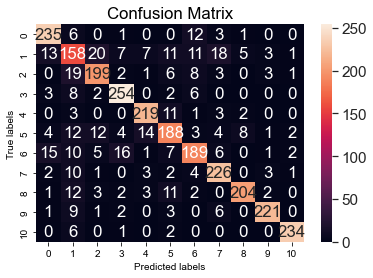

In [34]:
ax = plt.subplot()
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

---
# GridSearch 

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
params = {
    'C': [1, 5, 10],
    'kernel': ['rbf'],
    'gamma': ['auto', 'scale']
}

In [47]:
grid_search = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=4, n_jobs=-1)

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [49]:
grid_search.best_estimator_

SVC(C=5)

In [50]:
grid_search.best_score_

0.8359815661182923

In [51]:
grid_search.best_params_

{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}